In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
save_dir = "plots/"

In [3]:
timepoints = ["170-210\nminutes", "210-270\nminutes", "270-330\nminutes", "330-390\nminutes", "390-450\nminutes"]
losses = {}

losses[timepoints[0]] = {}
losses[timepoints[0]]["filtered"] = {"Independent":( 58.77, 68.81), "OT":(35.17,42.51), "LineageOT":(27.67, 33.45)}
losses[timepoints[0]]["randomized, downsampled"] = {"Independent":( 40.09, 54.35), "OT":(22.98, 31.58), "LineageOT":(19.12, 26.91)}
losses[timepoints[0]]["ABpxp"] = {"Independent":(13.75, 22.02 ), "OT":(12.87, 20.24), "LineageOT":(9.39, 11.91)}
losses[timepoints[0]]["randomized, max_dim 50"] = {"Independent":(36.77, 53.91), "OT":(21.87,28.95), "LineageOT":(20.79,22.45)}


losses[timepoints[1]] = {}
losses[timepoints[1]]["filtered"] = {"Independent":( 96.92,113.18), "OT":(54.77,60.14), "LineageOT":(37.49, 41.45)}
losses[timepoints[1]]["randomized, downsampled"] = {"Independent":(63.83 , 80.44), "OT":(31.86, 42.11), "LineageOT":(25.71, 34.98)}
losses[timepoints[1]]["ABpxp"] = {"Independent":(26.68, 48.03 ), "OT":(19.33, 32.23), "LineageOT":(13.49, 22.51)}
losses[timepoints[1]]["randomized, max_dim 50"] = {"Independent":(57.57, 101.41), "OT":(27.53,36.49), "LineageOT":(19.88,29.01)}




losses[timepoints[2]] = {}
losses[timepoints[2]]["filtered"] = {"Independent":(114.36,151.80), "OT":(53.57,59.22), "LineageOT":(41.08, 49.36)}
losses[timepoints[2]]["randomized, downsampled"] = {"Independent":(110.26 , 79.26), "OT":(35.09, 42.75), "LineageOT":(30.56, 39.03)}
losses[timepoints[2]]["ABpxp"] = {"Independent":(49.79, 67.57 ), "OT":( 27.39, 36.06), "LineageOT":(20.94, 30.27)}
losses[timepoints[2]]["randomized, max_dim 50"] = {"Independent":(101.91, 150.06), "OT":(32.32,41.15), "LineageOT":(23.93,37.61)}




losses[timepoints[3]] = {}
losses[timepoints[3]]["filtered"] = {"Independent":(191.63,224.98), "OT":(62.86,70.95), "LineageOT":(50.82, 61.42)}
losses[timepoints[3]]["randomized, downsampled"] = {"Independent":( 133.08 , 141.59), "OT":( 44.34, 50.52), "LineageOT":(39.57, 47.69)}
losses[timepoints[3]]["ABpxp"] = {"Independent":(67.21, 97.86 ), "OT":(44.42, 53.22), "LineageOT":(40.76, 48.35)}
losses[timepoints[3]]["randomized, max_dim 50"] = {"Independent":(137.56, 182.18), "OT":(40.40,44.71), "LineageOT":(36.45,36.77)}


losses[timepoints[4]] = {}
losses[timepoints[4]]["filtered"] = {"Independent":(199.17,242.02), "OT":(41.88,42.96), "LineageOT":(34.51, 36.37)}
losses[timepoints[4]]["randomized, downsampled"] = {"Independent":( 166.47, 146.08), "OT":(43.39, 38.75), "LineageOT":(40.41, 36.83)}
losses[timepoints[4]]["ABpxp"] = {"Independent":(89.62, 109.96 ), "OT":(37.49, 33.48), "LineageOT":(34.82, 31.28)}
losses[timepoints[4]]["randomized, max_dim 50"] = {"Independent":(173.61, 195.4), "OT":(38.79,33.22), "LineageOT":(36.42,29.86)}




In [4]:
def plot_error(source_cells,
               data = losses,
               timepoints = timepoints,
               offset = 0.2,
               ot_color = "orange",
               lineageOT_color = "b",
               early_marker = "s",
               late_marker = ".",
               early_marker_size = 120,
               late_marker_size = 200,
               tick_font_size = 12,
               label_font_size = 18
              ):
    
    num_timepoints = len(timepoints)
    base_x_ticks = np.arange(num_timepoints)
    
    ot_early = [losses[timepoint][source_cells]["OT"][0]/losses[timepoint][source_cells]["Independent"][0]
                for timepoint in timepoints]
    ot_late = [losses[timepoint][source_cells]["OT"][1]/losses[timepoint][source_cells]["Independent"][1]
               for timepoint in timepoints]

    lineageOT_early = [losses[timepoint][source_cells]["LineageOT"][0]/losses[timepoint][source_cells]["Independent"][0]
                       for timepoint in timepoints]
    lineageOT_late = [losses[timepoint][source_cells]["LineageOT"][1]/losses[timepoint][source_cells]["Independent"][1]
                      for timepoint in timepoints]


    plt.scatter(base_x_ticks, ot_early, marker=early_marker, s = early_marker_size, color=ot_color, label = "OT ancestor error")
    plt.scatter(base_x_ticks+2*offset, ot_late, marker=late_marker, s = late_marker_size, color=ot_color, label = "OT descendant error")
    plt.scatter(base_x_ticks, lineageOT_early, marker=early_marker, s = early_marker_size, color=lineageOT_color, label = "LineageOT ancestor error")
    plt.scatter(base_x_ticks+2*offset, lineageOT_late, marker=late_marker, s = late_marker_size, color=lineageOT_color, label = "LineageOT descendant error")
    
    
    plt.ylim([0,1])
    plt.xticks(base_x_ticks+1.5*offset, timepoints, fontsize = tick_font_size)
    plt.yticks(fontsize = tick_font_size)
    plt.xlabel("Timepoints coupled", fontsize = label_font_size)
    if source_cells == 'randomized, max_dim 50':
        plt.ylabel("Normalized approx. error", fontsize = label_font_size)
    else:
        plt.ylabel("Normalized error", fontsize = label_font_size)
    plt.legend(fontsize = tick_font_size)
    

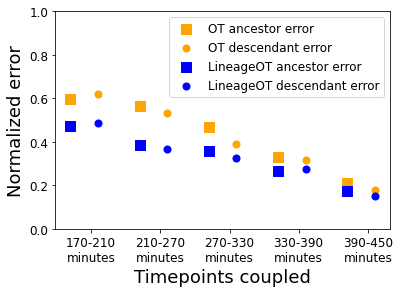

In [5]:
plot_error("filtered")
plt.savefig(save_dir + "figure_3a.pdf", bbox_inches = "tight")


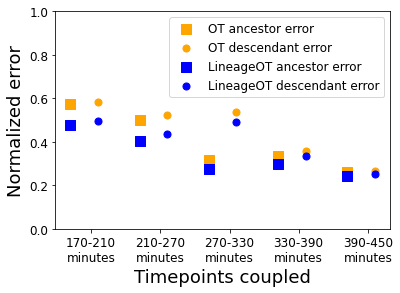

In [6]:
# This figure was not shown in the paper
# Here we took a random subsample of the cells with randomly-imputed precise lineage labels
plot_error("randomized, downsampled")

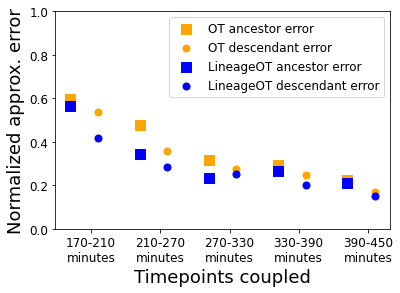

In [7]:
plot_error("randomized, max_dim 50")
plt.savefig(save_dir + "figure_S4a.pdf", bbox_inches = "tight")

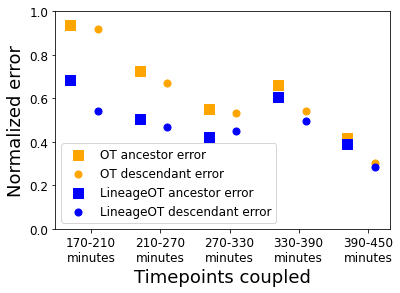

In [8]:
plot_error("ABpxp")
plt.savefig(save_dir + "figure_S3a.pdf", bbox_inches = "tight")
# ABpxp -> either ABprp or ABplp